In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

2024-03-05 20:33:40.678379: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-05 20:33:40.707845: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-05 20:33:40.707880: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-05 20:33:40.708769: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-05 20:33:40.713783: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-05 20:33:40.714698: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [4]:
train_dir = './PetImages'

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 25000 images belonging to 2 classes.


In [6]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

2024-03-05 20:34:00.751684: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-05 20:34:00.752122: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


58889256/58889256 [==============================] - 6s 0us/step


In [7]:
for layer in base_model.layers:
    layer.trainable = False

In [8]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

In [9]:
model = Model(inputs=base_model.input, outputs=predictions)

In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
from keras.preprocessing.image import load_img, img_to_array

In [19]:
img = load_img('./Testers/1.png', target_size=(224, 224))

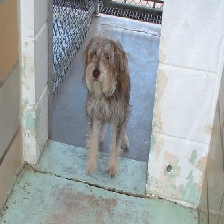

In [20]:
img

In [21]:
x = img_to_array(img)
x = x.reshape((1,) + x.shape)
x = x.astype('float32')
x /= 255

In [22]:
prediction = model.predict(x)
print('Predição:', prediction.argmax(axis=1))

1/1 [==============================] - 1s 583ms/step
Predição: [0]
